# Section 1: Data Loading and Preprocessing
## Dry Bean Dataset Analysis

This notebook handles the data loading and preprocessing for the Dry Bean Dataset from UCI ML Repository.

**Dataset Information:**
- **Source**: UCI ML Repository (ID: 602)
- **Task**: Multi-class classification of dry bean varieties
- **Features**: 16 numerical features (geometric and shape-based)
- **Classes**: 7 different bean varieties
- **Samples**: 13,611 instances

**Analysis Components:**
- Data loading and exploration
- Feature analysis and visualization
- Data preprocessing and scaling
- Train/validation/test splits
- Class distribution analysis

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

# UCI ML Repository
from ucimlrepo import fetch_ucirepo

# Set random seeds for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Section 1: Data Loading and Preprocessing")
print("Dataset: Dry Bean Classification")

📊 Section 1: Data Loading and Preprocessing
Dataset: Dry Bean Classification


## 1.1 Data Loading

In [2]:
# Load the Dry Bean Dataset
print("Loading Dry Bean Dataset...")
drybean_original = fetch_ucirepo(id=602)
drybean = drybean_original.data.original

print(f"Dataset shape: {drybean.shape}")
print(f"\nDataset info:")
print(drybean.info())

# Display first few rows
print(f"\nFirst 5 rows:")
print(drybean.head())

Loading Dry Bean Dataset...
Dataset shape: (13611, 17)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  f

In [3]:
# Display class distribution
print(f"\nClass distribution:")
class_counts = drybean['Class'].value_counts()
print(class_counts)

# Calculate class imbalance ratios
total_samples = len(drybean)
print(f"\nClass proportions:")
for class_name, count in class_counts.items():
    proportion = count / total_samples * 100
    print(f"  {class_name}: {count} samples ({proportion:.2f}%)")

# Check for most/least represented classes
max_class = class_counts.idxmax()
min_class = class_counts.idxmin()
imbalance_ratio = class_counts[max_class] / class_counts[min_class]
print(f"\nClass imbalance ratio (max/min): {imbalance_ratio:.2f}:1")
print(f"Most represented: {max_class} ({class_counts[max_class]} samples)")
print(f"Least represented: {min_class} ({class_counts[min_class]} samples)")


Class distribution:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

Class proportions:
  DERMASON: 3546 samples (26.05%)
  SIRA: 2636 samples (19.37%)
  SEKER: 2027 samples (14.89%)
  HOROZ: 1928 samples (14.17%)
  CALI: 1630 samples (11.98%)
  BARBUNYA: 1322 samples (9.71%)
  BOMBAY: 522 samples (3.84%)

Class imbalance ratio (max/min): 6.79:1
Most represented: DERMASON (3546 samples)
Least represented: BOMBAY (522 samples)


## 1.2 Feature Analysis

In [4]:
# Analyze features
feature_columns = [col for col in drybean.columns if col != 'Class']
print(f"Number of features: {len(feature_columns)}")
print(f"\nFeature names:")
for i, feature in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {feature}")

# Feature statistics
print(f"\nFeature statistics:")
print(drybean[feature_columns].describe())

Number of features: 16

Feature names:
   1. Area
   2. Perimeter
   3. MajorAxisLength
   4. MinorAxisLength
   5. AspectRatio
   6. Eccentricity
   7. ConvexArea
   8. EquivDiameter
   9. Extent
  10. Solidity
  11. Roundness
  12. Compactness
  13. ShapeFactor1
  14. ShapeFactor2
  15. ShapeFactor3
  16. ShapeFactor4

Feature statistics:
                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

        

In [5]:
# Check for missing values
print("Missing values per column:")
missing_values = drybean.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No missing values found")
else:
    print(missing_values[missing_values > 0])

# Check data types
print(f"\nData types:")
print(drybean.dtypes)

Missing values per column:
✅ No missing values found

Data types:
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRatio        float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
Roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


## 1.3 Data Visualization

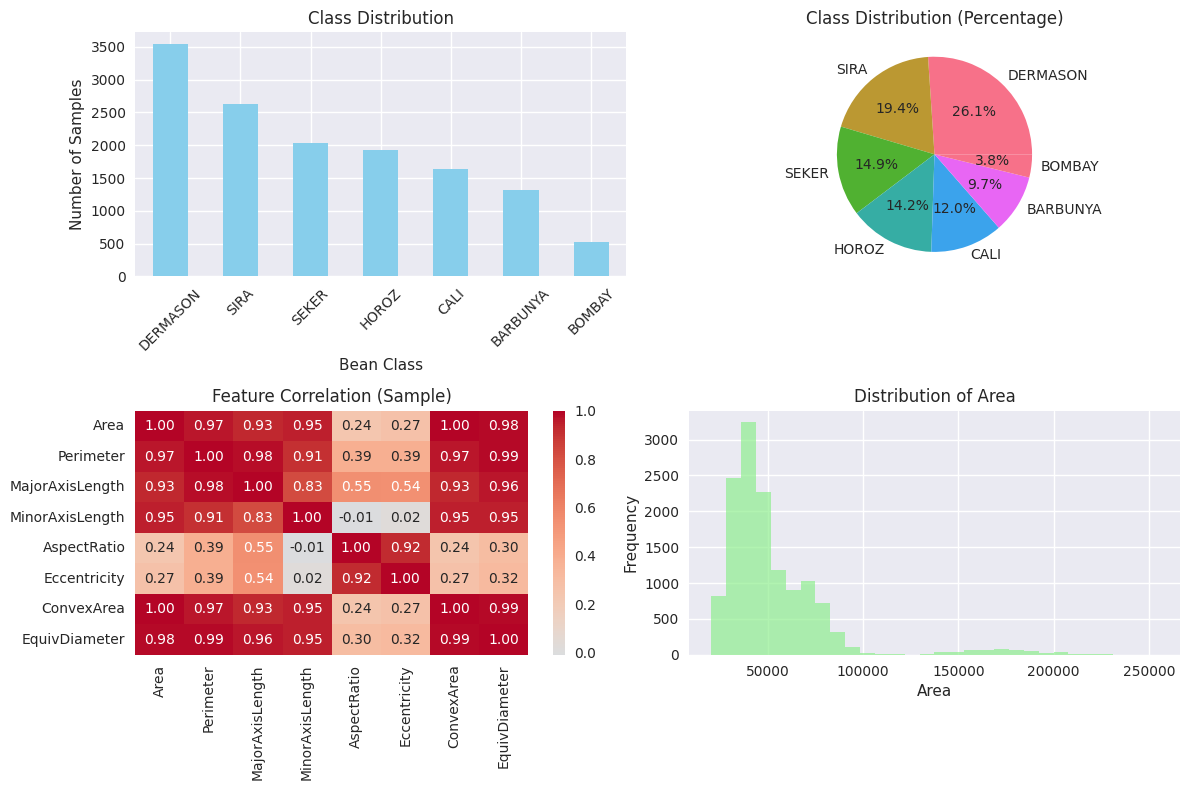

In [6]:
# Visualize class distribution
plt.figure(figsize=(12, 8))

# Class distribution bar plot
plt.subplot(2, 2, 1)
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Bean Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)

# Class distribution pie chart
plt.subplot(2, 2, 2)
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution (Percentage)')
plt.ylabel('')

# Feature correlation heatmap (sample of features)
plt.subplot(2, 2, 3)
# Select a subset of features for better visualization
sample_features = feature_columns[:8]  # First 8 features
corr_matrix = drybean[sample_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation (Sample)')

# Feature distribution example
plt.subplot(2, 2, 4)
plt.hist(drybean[feature_columns[0]], bins=30, alpha=0.7, color='lightgreen')
plt.title(f'Distribution of {feature_columns[0]}')
plt.xlabel(feature_columns[0])
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

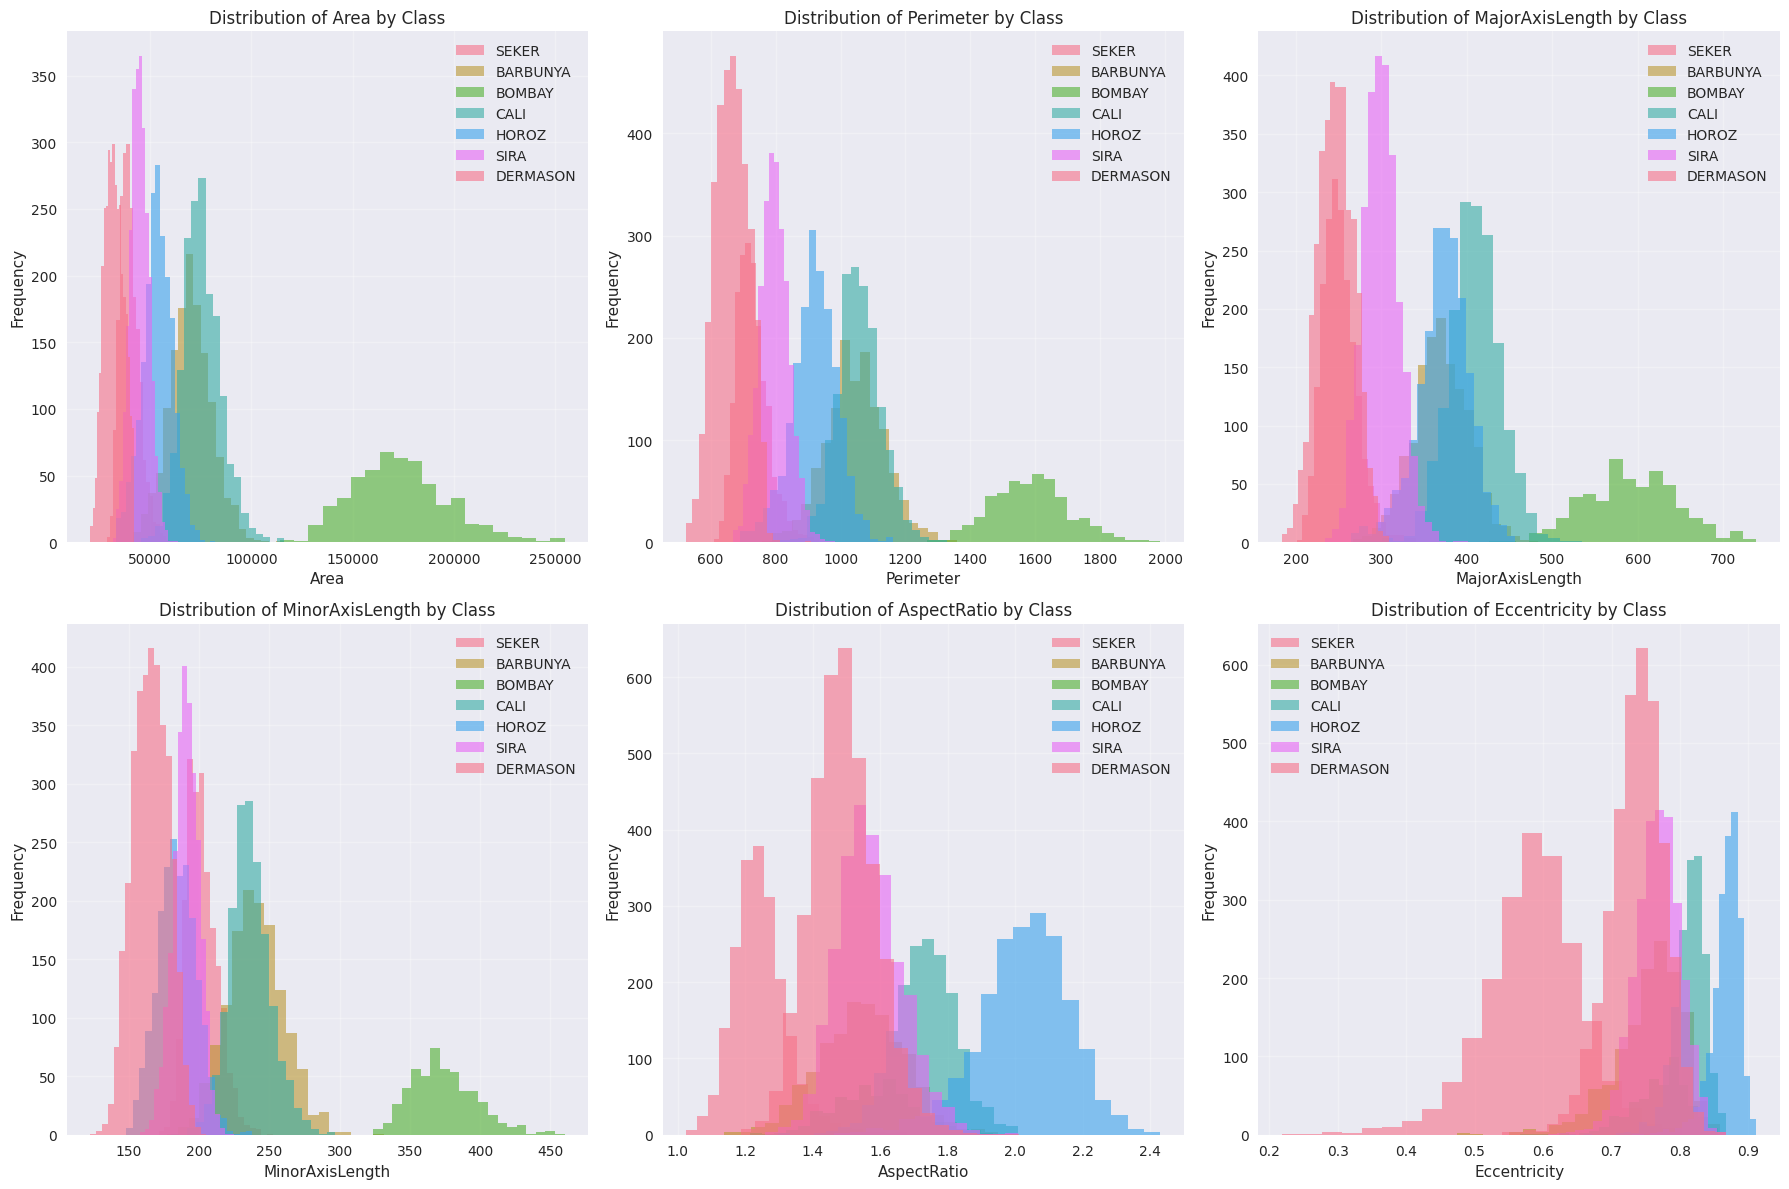

In [7]:
# Feature distributions by class (for selected features)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Select 6 most interesting features for visualization
selected_features = feature_columns[:6]

for i, feature in enumerate(selected_features):
    for class_name in drybean['Class'].unique():
        class_data = drybean[drybean['Class'] == class_name][feature]
        axes[i].hist(class_data, alpha=0.6, label=class_name, bins=20)
    
    axes[i].set_title(f'Distribution of {feature} by Class')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 1.4 Data Preprocessing

In [8]:
# Preprocessing
df = drybean.copy()

# Encode target variable
label_encoder = LabelEncoder()
df['Class_encoded'] = label_encoder.fit_transform(df['Class'])

# Create class mapping for reference
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class encoding mapping:")
for original, encoded in class_mapping.items():
    print(f"  {original} -> {encoded}")

# Define feature names (all numerical features)
feature_names = feature_columns
print(f"\nFeature names ({len(feature_names)} features):")
for i, name in enumerate(feature_names, 1):
    print(f"  {i:2d}. {name}")

Class encoding mapping:
  BARBUNYA -> 0
  BOMBAY -> 1
  CALI -> 2
  DERMASON -> 3
  HOROZ -> 4
  SEKER -> 5
  SIRA -> 6

Feature names (16 features):
   1. Area
   2. Perimeter
   3. MajorAxisLength
   4. MinorAxisLength
   5. AspectRatio
   6. Eccentricity
   7. ConvexArea
   8. EquivDiameter
   9. Extent
  10. Solidity
  11. Roundness
  12. Compactness
  13. ShapeFactor1
  14. ShapeFactor2
  15. ShapeFactor3
  16. ShapeFactor4


In [9]:
# Separate features and target
X = df[feature_names].values
y = df['Class_encoded'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class labels: {sorted(np.unique(y))}")

# Verify feature statistics
print(f"\nFeature value ranges:")
for i, feature_name in enumerate(feature_names[:5]):  # Show first 5
    print(f"  {feature_name}: [{X[:, i].min():.2f}, {X[:, i].max():.2f}]")
print("  ...")

Features shape: (13611, 16)
Target shape: (13611,)
Number of classes: 7
Class labels: [0, 1, 2, 3, 4, 5, 6]

Feature value ranges:
  Area: [20420.00, 254616.00]
  Perimeter: [524.74, 1985.37]
  MajorAxisLength: [183.60, 738.86]
  MinorAxisLength: [122.51, 460.20]
  AspectRatio: [1.02, 2.43]
  ...


## 1.5 Data Splitting

In [10]:
# Split the data
# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 80% train, 20% val (of the temp set)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Check class distribution in splits
print(f"\nClass distribution in splits:")
train_dist = np.bincount(y_train)
val_dist = np.bincount(y_val)
test_dist = np.bincount(y_test)

print(f"Training:   {train_dist}")
print(f"Validation: {val_dist}")
print(f"Test:       {test_dist}")

# Verify proportions are maintained
print(f"\nClass proportions in training set:")
for i, class_name in enumerate(label_encoder.classes_):
    proportion = train_dist[i] / len(y_train) * 100
    print(f"  {class_name} (class {i}): {proportion:.2f}%")

Training set: (8710, 16)
Validation set: (2178, 16)
Test set: (2723, 16)

Class distribution in splits:
Training:   [ 846  334 1043 2269 1234 1297 1687]
Validation: [211  84 261 568 308 324 422]
Test:       [265 104 326 709 386 406 527]

Class proportions in training set:
  BARBUNYA (class 0): 9.71%
  BOMBAY (class 1): 3.83%
  CALI (class 2): 11.97%
  DERMASON (class 3): 26.05%
  HOROZ (class 4): 14.17%
  SEKER (class 5): 14.89%
  SIRA (class 6): 19.37%


## 1.6 Feature Scaling

In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training set: {X_train_scaled.shape}")
print(f"Scaled validation set: {X_val_scaled.shape}")
print(f"Scaled test set: {X_test_scaled.shape}")

# Verify scaling worked correctly
print(f"\nScaling verification (training set):")
print(f"  Mean (should be ~0): {X_train_scaled.mean(axis=0)[:3]}...")
print(f"  Std (should be ~1):  {X_train_scaled.std(axis=0)[:3]}...")

# Show scaling effect on a sample feature
sample_feature_idx = 0
print(f"\nScaling effect on '{feature_names[sample_feature_idx]}':")
print(f"  Original range: [{X_train[:, sample_feature_idx].min():.2f}, {X_train[:, sample_feature_idx].max():.2f}]")
print(f"  Scaled range:   [{X_train_scaled[:, sample_feature_idx].min():.2f}, {X_train_scaled[:, sample_feature_idx].max():.2f}]")

Scaled training set: (8710, 16)
Scaled validation set: (2178, 16)
Scaled test set: (2723, 16)

Scaling verification (training set):
  Mean (should be ~0): [-7.50770794e-17  1.87633555e-14 -9.74823615e-15]...
  Std (should be ~1):  [1. 1. 1.]...

Scaling effect on 'Area':
  Original range: [20420.00, 248424.00]
  Scaled range:   [-1.11, 6.64]


## 1.7 Data Summary and Export

In [12]:
# Create comprehensive data summary
data_summary = {
    'dataset_info': {
        'name': 'Dry Bean Dataset',
        'source': 'UCI ML Repository (ID: 602)',
        'total_samples': len(drybean),
        'num_features': len(feature_names),
        'num_classes': len(label_encoder.classes_),
        'class_names': list(label_encoder.classes_),
        'task_type': 'Multi-class Classification'
    },
    'data_splits': {
        'train_size': len(X_train),
        'val_size': len(X_val),
        'test_size': len(X_test),
        'train_ratio': len(X_train) / len(drybean),
        'val_ratio': len(X_val) / len(drybean),
        'test_ratio': len(X_test) / len(drybean)
    },
    'class_distribution': dict(class_counts),
    'feature_names': feature_names,
    'class_mapping': class_mapping
}

print("📊 DATA PREPROCESSING SUMMARY")
print("=" * 50)
print(f"Dataset: {data_summary['dataset_info']['name']}")
print(f"Total Samples: {data_summary['dataset_info']['total_samples']:,}")
print(f"Features: {data_summary['dataset_info']['num_features']}")
print(f"Classes: {data_summary['dataset_info']['num_classes']}")
print(f"\nData Splits:")
print(f"  Training:   {data_summary['data_splits']['train_size']:,} ({data_summary['data_splits']['train_ratio']:.1%})")
print(f"  Validation: {data_summary['data_splits']['val_size']:,} ({data_summary['data_splits']['val_ratio']:.1%})")
print(f"  Test:       {data_summary['data_splits']['test_size']:,} ({data_summary['data_splits']['test_ratio']:.1%})")
print(f"\nClass Balance:")
for class_name, count in class_counts.items():
    percentage = count / len(drybean) * 100
    print(f"  {class_name}: {count:,} ({percentage:.1f}%)")

print(f"\n✅ Data preprocessing completed successfully!")
print(f"📁 Ready for model training in Section 2")

📊 DATA PREPROCESSING SUMMARY
Dataset: Dry Bean Dataset
Total Samples: 13,611
Features: 16
Classes: 7

Data Splits:
  Training:   8,710 (64.0%)
  Validation: 2,178 (16.0%)
  Test:       2,723 (20.0%)

Class Balance:
  DERMASON: 3,546 (26.1%)
  SIRA: 2,636 (19.4%)
  SEKER: 2,027 (14.9%)
  HOROZ: 1,928 (14.2%)
  CALI: 1,630 (12.0%)
  BARBUNYA: 1,322 (9.7%)
  BOMBAY: 522 (3.8%)

✅ Data preprocessing completed successfully!
📁 Ready for model training in Section 2


In [13]:
# Save preprocessed data for use in other notebooks
import pickle

# Save all necessary variables
preprocessing_data = {
    'X_train_scaled': X_train_scaled,
    'X_val_scaled': X_val_scaled,
    'X_test_scaled': X_test_scaled,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test,
    'feature_names': feature_names,
    'class_mapping': class_mapping,
    'label_encoder': label_encoder,
    'scaler': scaler,
    'data_summary': data_summary
}

# Save to pickle file
with open('dry_bean_preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessing_data, f)

print("💾 Preprocessed data saved to 'dry_bean_preprocessed_data.pkl'")
print("📋 This file contains all necessary data for Sections 2 and 3")

# Also save a CSV version for easy inspection
df_export = pd.DataFrame(X_train_scaled, columns=feature_names)
df_export['Class'] = y_train
df_export.to_csv('dry_bean_train_scaled.csv', index=False)
print("📄 Training data also saved as 'dry_bean_train_scaled.csv'")

💾 Preprocessed data saved to 'dry_bean_preprocessed_data.pkl'
📋 This file contains all necessary data for Sections 2 and 3
📄 Training data also saved as 'dry_bean_train_scaled.csv'
